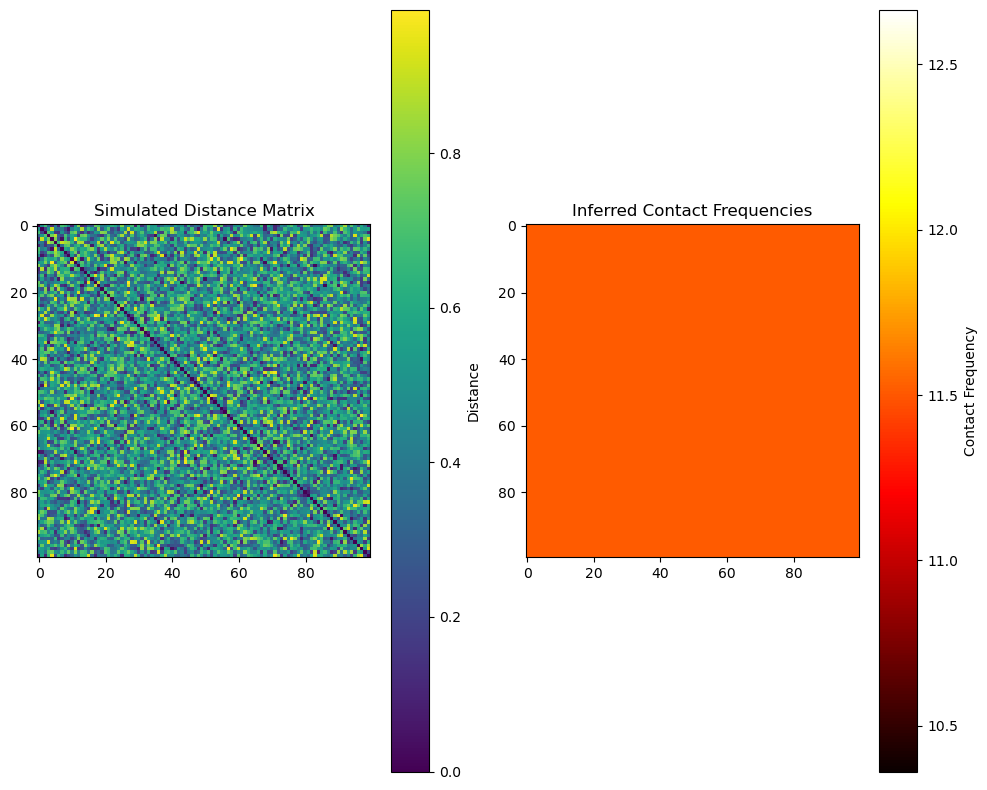

In [1]:
## this is the sim3C equations and playing around with what they did, make sure they have an accurate contact map looks good due to the expected diag

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
num_loci = 100  # Number of genomic loci
num_slices = 500  # Number of slices
lambda_detection = 0.1  # Scaling factor for detection efficiency

# Step 1: Generate a simulated distance matrix
np.random.seed(42)  # For reproducibility
distance_matrix = np.random.rand(num_loci, num_loci)
distance_matrix = (distance_matrix + distance_matrix.T) / 2  # Make it symmetric
np.fill_diagonal(distance_matrix, 0)  # Set self-distances to 0

# Step 2: Transform distances into contact probabilities
def distance_to_probability(d, lambda_detection):
    return 1 - np.exp(-lambda_detection * (1 / (d + 1e-5)))  # Avoid division by zero

contact_prob_matrix = distance_to_probability(distance_matrix, lambda_detection)

# Step 3: Simulate slices
binary_matrix = np.zeros((num_slices, num_loci), dtype=int)

for i in range(num_slices):
    for j in range(num_loci):
        if np.random.rand() < contact_prob_matrix[j, j]:  # Self-contact probability
            binary_matrix[i, j] = 1

# Step 4: Compute co-occurrence statistics
co_occurrence_matrix = np.dot(binary_matrix.T, binary_matrix)

# Normalize co-occurrence values to estimate probabilities
co_occurrence_prob = co_occurrence_matrix / num_slices

# Step 5: Infer contact frequencies
contact_frequencies = -np.log(1 - co_occurrence_prob + 1e-5)  # Adding epsilon to avoid log(0)

# Visualization
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Simulated Distance Matrix")
plt.imshow(distance_matrix, cmap="viridis")
plt.colorbar(label="Distance")

plt.subplot(1, 2, 2)
plt.title("Inferred Contact Frequencies")
plt.imshow(contact_frequencies, cmap="hot")
plt.colorbar(label="Contact Frequency")

plt.tight_layout()
plt.show()


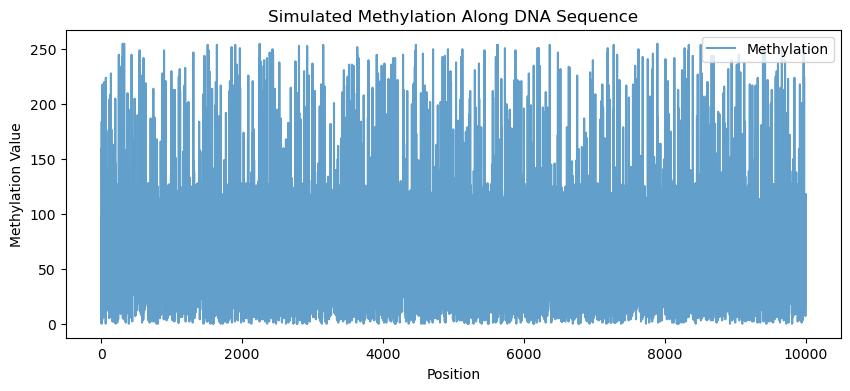

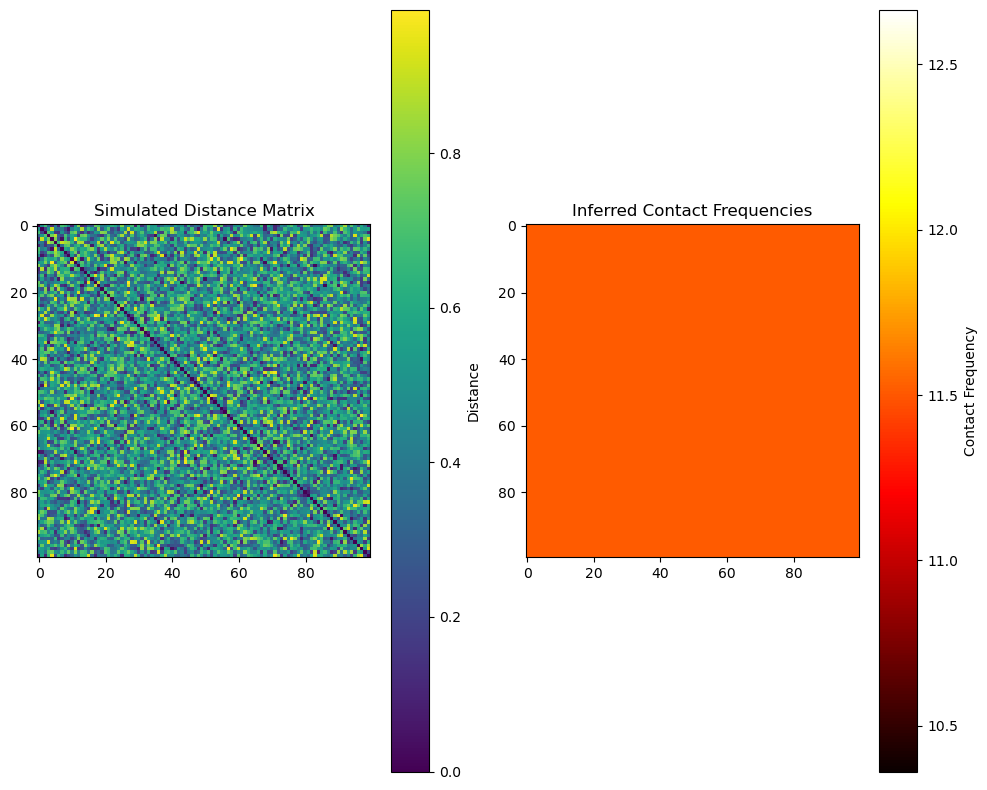

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters for the simulation
num_loci = 100  # Number of genomic loci
num_slices = 500  # Number of slices
lambda_detection = 0.1  # Scaling factor for detection efficiency

# Step 1: Generate a simulated distance matrix
np.random.seed(42)  # For reproducibility
distance_matrix = np.random.rand(num_loci, num_loci)
distance_matrix = (distance_matrix + distance_matrix.T) / 2  # Make it symmetric
np.fill_diagonal(distance_matrix, 0)  # Set self-distances to 0

# Step 2: Transform distances into contact probabilities
def distance_to_probability(d, lambda_detection):
    return 1 - np.exp(-lambda_detection * (1 / (d + 1e-5)))  # Avoid division by zero

contact_prob_matrix = distance_to_probability(distance_matrix, lambda_detection)

# Step 3: Simulate slices
binary_matrix = np.zeros((num_slices, num_loci), dtype=int)

for i in range(num_slices):
    for j in range(num_loci):
        if np.random.rand() < contact_prob_matrix[j, j]:  # Self-contact probability
            binary_matrix[i, j] = 1

# Step 4: Compute co-occurrence statistics
co_occurrence_matrix = np.dot(binary_matrix.T, binary_matrix)

# Normalize co-occurrence values to estimate probabilities
co_occurrence_prob = co_occurrence_matrix / num_slices

# Step 5: Infer contact frequencies
contact_frequencies = -np.log(1 - co_occurrence_prob + 1e-5)  # Adding epsilon to avoid log(0)

# Step 6: DNA sequence simulation
def generate_dna_sequence(length=10000):
    bases = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(bases) for _ in range(length))

dna_sequence = generate_dna_sequence()

# Find CG sites
def find_sites(dna_sequence, site='CG'):
    len_site = len(site)
    return [i for i in range(len(dna_sequence) - len_site + 1) if dna_sequence[i:i+len_site] == site]

cg_sites = find_sites(dna_sequence)

# Simulate methylation
def simulate_methylation(dna_sequence, sites):
    len_seq = len(dna_sequence)
    return [random.randint(128, 255) if i in sites else random.randint(0, 128) for i in range(len_seq)]

methylation_values = simulate_methylation(dna_sequence, cg_sites)

# Visualization of methylation values
plt.figure(figsize=(10, 4))
plt.plot(methylation_values, alpha=0.7, label="Methylation")
plt.title("Simulated Methylation Along DNA Sequence")
plt.xlabel("Position")
plt.ylabel("Methylation Value")
plt.legend()
plt.show()

# Visualization of contact frequencies
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Simulated Distance Matrix")
plt.imshow(distance_matrix, cmap="viridis")
plt.colorbar(label="Distance")

plt.subplot(1, 2, 2)
plt.title("Inferred Contact Frequencies")
plt.imshow(contact_frequencies, cmap="hot")
plt.colorbar(label="Contact Frequency")

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import random
import pysam

# Parameters for the simulation
num_loci = 100  # Number of genomic loci
num_slices = 500  # Number of slices
lambda_detection = 0.1  # Scaling factor for detection efficiency
num_reads = 10000  # Number of reads to generate

# Step 1: Generate a simulated distance matrix
np.random.seed(42)  # For reproducibility
distance_matrix = np.random.rand(num_loci, num_loci)
distance_matrix = (distance_matrix + distance_matrix.T) / 2  # Make it symmetric
np.fill_diagonal(distance_matrix, 0)  # Set self-distances to 0

# Step 2: Transform distances into contact probabilities
def distance_to_probability(d, lambda_detection):
    return 1 - np.exp(-lambda_detection * (1 / (d + 1e-5)))  # Avoid division by zero

contact_prob_matrix = distance_to_probability(distance_matrix, lambda_detection)

# Step 3: Simulate slices
binary_matrix = np.zeros((num_slices, num_loci), dtype=int)

for i in range(num_slices):
    for j in range(num_loci):
        if np.random.rand() < contact_prob_matrix[j, j]:  # Self-contact probability
            binary_matrix[i, j] = 1

# Step 4: Compute co-occurrence statistics
co_occurrence_matrix = np.dot(binary_matrix.T, binary_matrix)

# Normalize co-occurrence values to estimate probabilities
co_occurrence_prob = co_occurrence_matrix / num_slices

# Step 5: Infer contact frequencies
contact_frequencies = -np.log(1 - co_occurrence_prob + 1e-5)  # Adding epsilon to avoid log(0)

# Step 6: DNA sequence simulation
def generate_dna_sequence(length=10000):
    bases = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(bases) for _ in range(length))

dna_sequence = generate_dna_sequence()

# Find restriction enzyme sites
def find_sites(dna_sequence, site='ACT'):  # Example restriction enzyme site
    len_site = len(site)
    return [i for i in range(len(dna_sequence) - len_site + 1) if dna_sequence[i:i+len_site] == site]

enzyme_sites = find_sites(dna_sequence)

# Step 7: Generate reads from contact mapping
def generate_reads(num_reads, enzyme_sites):
    reads = []
    for _ in range(num_reads):
        contact_site = random.choice(enzyme_sites)
        if len(enzyme_sites) > 1:
            before_site = max([s for s in enzyme_sites if s < contact_site and contact_site - s <= 300], default=contact_site)
            after_site = min([s for s in enzyme_sites if s > contact_site and s - contact_site <= 300], default=contact_site)

            read_seq = dna_sequence[before_site:contact_site][::-1] + dna_sequence[contact_site:after_site]
            reads.append(read_seq)
    return reads

reads = generate_reads(num_reads, enzyme_sites)

import os

# Step 8: Save as unaligned BAM file
def save_to_bam(reads, output_file="simulated_reads.bam"):
    # Save to a writable directory, like the home directory
    writable_dir = os.path.expanduser("~")
    output_path = os.path.join(writable_dir, output_file)

    with pysam.AlignmentFile(output_path, "wb", header={"HD": {"VN": "1.0"}, "SQ": [{"LN": len(dna_sequence), "SN": "simulated"}]}) as bam_file:
        for i, read_seq in enumerate(reads):
            a = pysam.AlignedSegment()
            a.query_name = f"read_{i}"
            a.query_sequence = read_seq
            a.flag = 4  # Unmapped
            a.reference_id = -1
            a.reference_start = -1
            a.mapping_quality = 0
            a.cigar = []
            a.query_qualities = pysam.qualitystring_to_array('I' * len(read_seq))
            bam_file.write(a)

    print(f"Generated {num_reads} reads and saved to {output_path}")

save_to_bam(reads)



Generated 10000 reads and saved to /Users/jamiemoore/simulated_reads.bam


## Working Code Bock with randomly generated reads 
- recieved help from Sim3C equations from their paper of how they simulated HiC data, took part of what Rafael made before and ChatGPT to fix some of my code and correctly implement the Sim3C equations 

In [2]:
import numpy as np
import random
import pysam

# Parameters for the simulation
num_loci = 100  # Number of genomic loci
num_slices = 500  # Number of slices
lambda_detection = 0.1  # Scaling factor for detection efficiency
num_reads = 10000  # Number of reads to generate

# Step 1: Generate a simulated distance matrix
np.random.seed(42)  # For reproducibility
distance_matrix = np.random.rand(num_loci, num_loci)
distance_matrix = (distance_matrix + distance_matrix.T) / 2  # Make it symmetric
np.fill_diagonal(distance_matrix, 0)  # Set self-distances to 0

# Step 2: Transform distances into contact probabilities
def distance_to_probability(d, lambda_detection):
    return 1 - np.exp(-lambda_detection * (1 / (d + 1e-5)))  # Avoid division by zero

contact_prob_matrix = distance_to_probability(distance_matrix, lambda_detection)

# Step 3: Simulate slices
binary_matrix = np.zeros((num_slices, num_loci), dtype=int)

for i in range(num_slices):
    for j in range(num_loci):
        if np.random.rand() < contact_prob_matrix[j, j]:  # Self-contact probability
            binary_matrix[i, j] = 1

# Step 4: Compute co-occurrence statistics
co_occurrence_matrix = np.dot(binary_matrix.T, binary_matrix)

# Normalize co-occurrence values to estimate probabilities
co_occurrence_prob = co_occurrence_matrix / num_slices

# Step 5: Infer contact frequencies
contact_frequencies = -np.log(1 - co_occurrence_prob + 1e-5)  # Adding epsilon to avoid log(0)

# Step 6: DNA sequence simulation
def generate_dna_sequence(length=10000):
    bases = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(bases) for _ in range(length))

dna_sequence = generate_dna_sequence()

# Find restriction enzyme sites
def find_sites(dna_sequence, site='ACT'):  # Example restriction enzyme site
    len_site = len(site)
    return [i for i in range(len(dna_sequence) - len_site + 1) if dna_sequence[i:i+len_site] == site]

enzyme_sites = find_sites(dna_sequence)

# Simulate methylation
def simulate_methylation(dna_sequence, sites):
    len_seq = len(dna_sequence)
    methylation = []
    for i in range(len_seq):
        # Check for CG-rich region within 20 bp before and after
        region = dna_sequence[max(0, i-20):min(len_seq, i+21)]
        num_cgs = sum(1 for j in range(len(region)-1) if region[j:j+2] == "CG")
        if num_cgs > 3:
            methylation.append(random.randint(0, 155))  # Low methylation
        else:
            methylation.append(random.randint(155, 255))  # High methylation
    return methylation

methylation_values = simulate_methylation(dna_sequence, enzyme_sites)

# Step 7: Generate reads from contact mapping

def generate_reads(num_reads, enzyme_sites):
    reads = []
    meth_reads = []
    for _ in range(num_reads):
        contact_site = random.choice(enzyme_sites)
        if len(enzyme_sites) > 1:
            before_site = max([s for s in enzyme_sites if s < contact_site and contact_site - s <= 300], default=contact_site)
            after_site = min([s for s in enzyme_sites if s > contact_site and s - contact_site <= 300], default=contact_site)

            read_seq = dna_sequence[before_site:contact_site][::-1] + dna_sequence[contact_site:after_site]
            meth_seq = methylation_values[before_site:contact_site][::-1] + methylation_values[contact_site:after_site]

            reads.append(read_seq)
            meth_reads.append(meth_seq)
    return reads, meth_reads

reads, meth_reads = generate_reads(num_reads, enzyme_sites)

# Step 8: Save as unaligned BAM file
def save_to_bam(reads, meth_reads, output_file="simulated_reads.bam"):
    with pysam.AlignmentFile(output_file, "wb", header={"HD": {"VN": "1.0"}, "SQ": [{"LN": len(dna_sequence), "SN": "simulated"}]}) as bam_file:
        for i, (read_seq, meth_seq) in enumerate(zip(reads, meth_reads)):
            a = pysam.AlignedSegment()
            a.query_name = f"read_{i}"
            a.query_sequence = read_seq
            a.flag = 4  # Unmapped
            a.reference_id = -1
            a.reference_start = -1
            a.mapping_quality = 0
            a.cigar = []
            a.query_qualities = pysam.qualitystring_to_array('I' * len(read_seq))
            a.set_tag("MM", f"{'C+m,'+','.join(map(str, meth_seq))}")  # Adding methylation tag
            bam_file.write(a)

save_to_bam(reads, meth_reads)

print(f"Generated {num_reads} reads and saved to simulated_reads.bam")


Generated 10000 reads and saved to simulated_reads.bam


### Final Working Code to generate reads from a reference file instead of random gen like code block above

In [1]:
import numpy as np
import random
import pysam

def distance_to_probability(d, lambda_detection):
    return 1 - np.exp(-lambda_detection * (1 / (d + 1e-5)))  # Avoid division by zero

def load_reference_genome(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Assuming FASTA format, concatenate lines after the header
        return ''.join(line.strip() for line in lines if not line.startswith('>'))

def find_sites(dna_sequence, site):  # Restriction enzyme site
    len_site = len(site)
    return [i for i in range(len(dna_sequence) - len_site + 1) if dna_sequence[i:i+len_site] == site]

def simulate_methylation(dna_sequence, sites):
    len_seq = len(dna_sequence)
    methylation = []
    for i in range(len_seq):
        # Check for CG-rich region within 20 bp before and after
        region = dna_sequence[max(0, i-20):min(len_seq, i+21)]
        num_cgs = sum(1 for j in range(len(region)-1) if region[j:j+2] == "CG")
        if num_cgs > 3:
            methylation.append(random.randint(0, 155))  # Low methylation
        else:
            methylation.append(random.randint(155, 255))  # High methylation
    return methylation

def generate_hic_matrix(dna_length, num_contacts, max_distance=1e6):
    """
    Simulate a Hi-C matrix by generating random crosslinked pairs of genomic loci.
    """
    contacts = []
    for _ in range(num_contacts):
        loc1 = random.randint(0, dna_length - 1)
        loc2 = loc1 + random.randint(1, int(max_distance))
        if loc2 < dna_length:
            contacts.append((loc1, loc2))
    return contacts

def generate_reads_with_crosslinks(num_reads, enzyme_sites, dna_sequence, methylation_values, crosslinks):
    reads = []
    meth_reads = []
    for _ in range(num_reads):
        # Randomly select a crosslink
        if crosslinks:
            loc1, loc2 = random.choice(crosslinks)
            fragment1 = dna_sequence[loc1:loc1+100]  # Take 100 bp around loc1
            fragment2 = dna_sequence[loc2:loc2+100]  # Take 100 bp around loc2

            methyl_fragment1 = methylation_values[loc1:loc1+100]
            methyl_fragment2 = methylation_values[loc2:loc2+100]

            read_seq = fragment1 + fragment2
            meth_seq = methyl_fragment1 + methyl_fragment2

            reads.append(read_seq)
            meth_reads.append(meth_seq)
    return reads, meth_reads

def save_to_bam(reads, meth_reads, dna_sequence, output_file):
    with pysam.AlignmentFile(output_file, "wb", header={"HD": {"VN": "1.0"}, "SQ": [{"LN": len(dna_sequence), "SN": "simulated"}]}) as bam_file:
        for i, (read_seq, meth_seq) in enumerate(zip(reads, meth_reads)):
            a = pysam.AlignedSegment()
            a.query_name = f"read_{i}"
            a.query_sequence = read_seq
            a.flag = 4  # Unmapped
            a.reference_id = -1
            a.reference_start = -1
            a.mapping_quality = 0
            a.cigar = []
            a.query_qualities = pysam.qualitystring_to_array('I' * len(read_seq))
            a.set_tag("MM", f"{'C+m,'+','.join(map(str, meth_seq))}")  # Adding methylation tag
            bam_file.write(a)

def main(reference_genome_path, enzyme_site, num_reads, num_crosslinks, output_file):
    dna_sequence = load_reference_genome(reference_genome_path)
    enzyme_sites = find_sites(dna_sequence, enzyme_site)
    methylation_values = simulate_methylation(dna_sequence, enzyme_sites)

    # Simulate Hi-C crosslink data
    crosslinks = generate_hic_matrix(len(dna_sequence), num_crosslinks)

    # Generate reads considering crosslinks
    reads, meth_reads = generate_reads_with_crosslinks(num_reads, enzyme_sites, dna_sequence, methylation_values, crosslinks)

    save_to_bam(reads, meth_reads, dna_sequence, output_file)
    print(f"Generated {num_reads} reads with {num_crosslinks} crosslinks and saved to {output_file}")

# Example usage
reference_genome_path = "GCF_000013425.1_ASM1342v1_genomic.fna"  # Replace with your actual reference genome path
enzyme_site = "ACT"  # Replace with desired enzyme site
num_reads = 10000  # Replace with desired number of reads
num_crosslinks = 500  # Replace with the number of crosslinks
output_file = "simulated_reads_with_crosslinks.bam"  # Replace with desired output file name

main(reference_genome_path, enzyme_site, num_reads, num_crosslinks, output_file)


Generated 10000 reads with 500 crosslinks and saved to simulated_reads_with_crosslinks.bam
